In [9]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [56]:
class Neural_Network(object):
    #intitialising Parameters
    def __init__(self):
        #HyperParameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Parameters
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    #Propagating our input through the neural netowrk
    def forward(self,X):
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
    
    #activation function
    #you could use other activation functions like ReLU and tanhz
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    #derivative of activation function
    def sigmoidPrime(self,z):
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self,X,Y):
        #determining the error for a given inputs X and outputs Y
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self,X,Y):
        #computing derivative with respect to W1 and W2
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
        
    def getParams(self):
        #converting W1 and W2 in the form of vectors
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self,params):
        #Setting W1 and W2 using parmater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        

    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
        
        

In [57]:
from scipy import optimize

In [70]:
class trainer(object):
    def __init__(self,N):
        #Neural network refernece
        self.N = N
        
    def costFunctionWrapper(self,params,X,y):
        self.N.setParams(params)
        cost = self.N.costFunction(X,y)
        grad = self.N.computeGradients(X,y)
        return cost, grad
    
    def callbackF(self,params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X,self.y))
        
    def train(self,X,y):
        
        self.X = X
        self.y = y
        
        self.J = []
        
        params0 = self.N.getParams()
        
        options = {'maxiter':200,'disp' : True}
        
        res = optimize.minimize(self.costFunctionWrapper, params0, \
                               jac = True, method ='BFGS',args=(X,y),\
                               options = options,callback=self.callbackF)
        
        self.N.setParams(res.x)
        self.optimizationResults = res

In [71]:
y


array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [72]:
X

array([[ 0.3,  0.5],
       [ 0.5,  0.1],
       [ 1. ,  0.2]])

In [73]:
NN = Neural_Network()

In [74]:
T = trainer(NN)

In [75]:
cost1 = NN.costFunction(X,y)
cost1

0.45599680869048592

In [76]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [77]:
dJdW1

array([[ 0.05376352, -0.00409204,  0.0608711 ],
       [ 0.02160347, -0.00161306,  0.02483925]])

In [78]:
grad = NN.computeGradients(X,y)

In [79]:
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 53
         Function evaluations: 59
         Gradient evaluations: 59


In [81]:
NN.forward(X)

array([[ 0.74993997],
       [ 0.81998146],
       [ 0.92999328]])

In [82]:
#Test network for various combinations of sleep/study:
hoursSleep = linspace(0, 10, 100)
hoursStudy = linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [86]:
allOutputs = NN.forward(allInputs)

Text(0,0.5,'Hours Study')

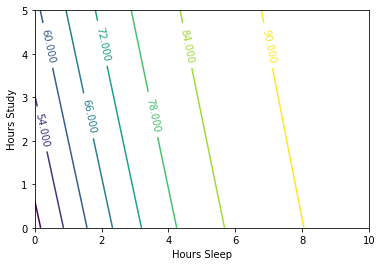

In [87]:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')

Text(0.5,0,'Test Score')

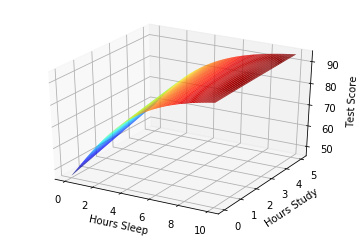

In [88]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')

In [23]:
yHat

array([[ 0.64410865],
       [ 0.67326902],
       [ 0.70238049]])

In [24]:
Y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

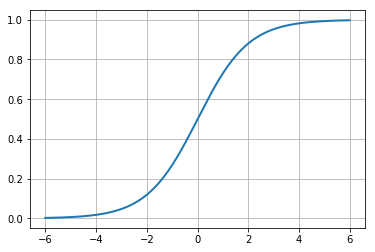

In [8]:
testInput = np.arange(-6,6,0.01)
plot(testInput,sigmoid(testInput),linewidth=2)
grid(1)

In [13]:
X = np.array(([3,5],[5,1],[10,2]),dtype = float) #the number of hours of sleep and hours of test on the day before
y = np.array(([75],[82],[93]),dtype = float) #the score in the test

In [14]:
X

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [15]:
y

array([[ 75.],
       [ 82.],
       [ 93.]])

In [17]:
#Normalizing the data
X = X/np.max(X)
y = y/100      #Because 100 is the max score

In [29]:
import time

weightsToTry = np.linspace(-10,10,1000)
costs = np.zeros(1000)

startTime = time.clock()
for i in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    yHat = NN.forward(X)
    costs[i] = 0.5*sum((Y-yHat)**2)
    
endTime = time.clock()

In [31]:
timeElapsed = endTime - startTime
timeElapsed

0.0381929999999997

Text(0.5,0,'Weight')

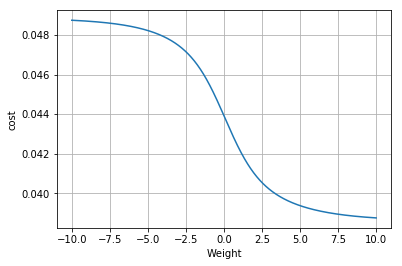

In [32]:
plot(weightsToTry,costs)
grid(1)
ylabel('cost')
xlabel('Weight')

In [33]:
0.04*(1000**(9-1))/(3600*24*365)

1268391679350583.5